In [1]:
import numpy as np
import pandas as pd
import math
from itertools import combinations
import matplotlib.pyplot as plt
from rectangle import Rectangle
from sklearn.linear_model import LinearRegression
import utility
import norm_region as norm

In [2]:
df = pd.read_csv("Data/Data3Dnoised5000.csv", index_col=0)
X = df.iloc[:,0:20].values
y = df[["r1", "r2", "r3"]].values
X_train, X_test, X_cal, y_train, y_test, y_cal = utility.calibration_split(X, y)
# Fit model to training
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9678109131513951


In [3]:
# Vectorized calibration scores
prediction = model.predict(X_cal)
scores = np.abs(prediction - y_cal)
scores_T = np.transpose(scores)

# Test scores
prediction_test = model.predict(X_test)
scores_test = np.abs(prediction_test - y_test)

# Level
N = math.ceil((1+len(scores)*0.9))/len(scores)

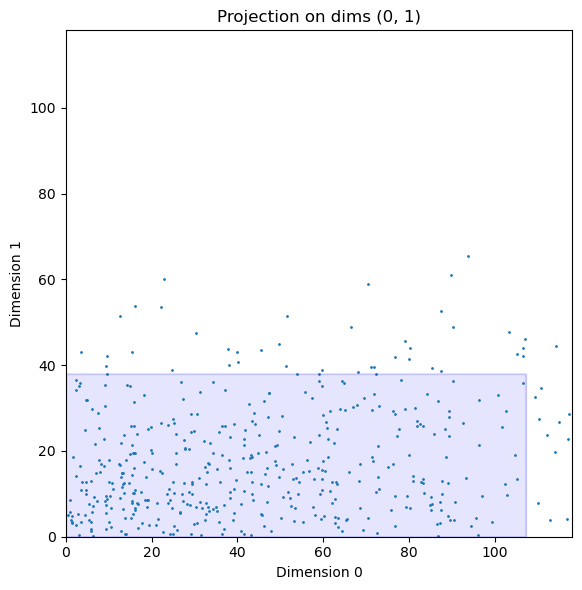

In [4]:
Bond = Rectangle(np.quantile(scores_T, N, axis=1))
fig, ax = Bond.plot(0,1)
ax.scatter(scores_T[0], scores_T[1], s=1)

# Norm-region method

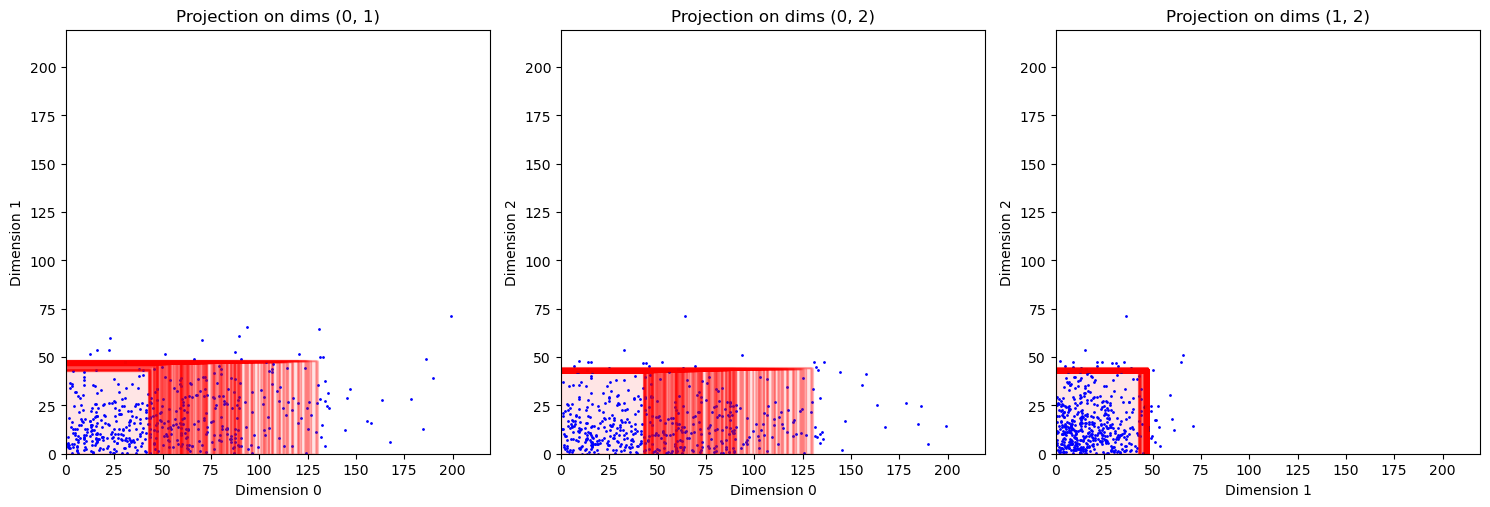

In [5]:
rectangles = norm.dissection_norm_region(scores)
regions = norm.configure_prediction_norm(scores, rectangles, 0.1)
fig1, axes1 = norm.make_scoreRegion_plot_norm(scores, regions)
plt.show()

In [6]:
len(regions)

252

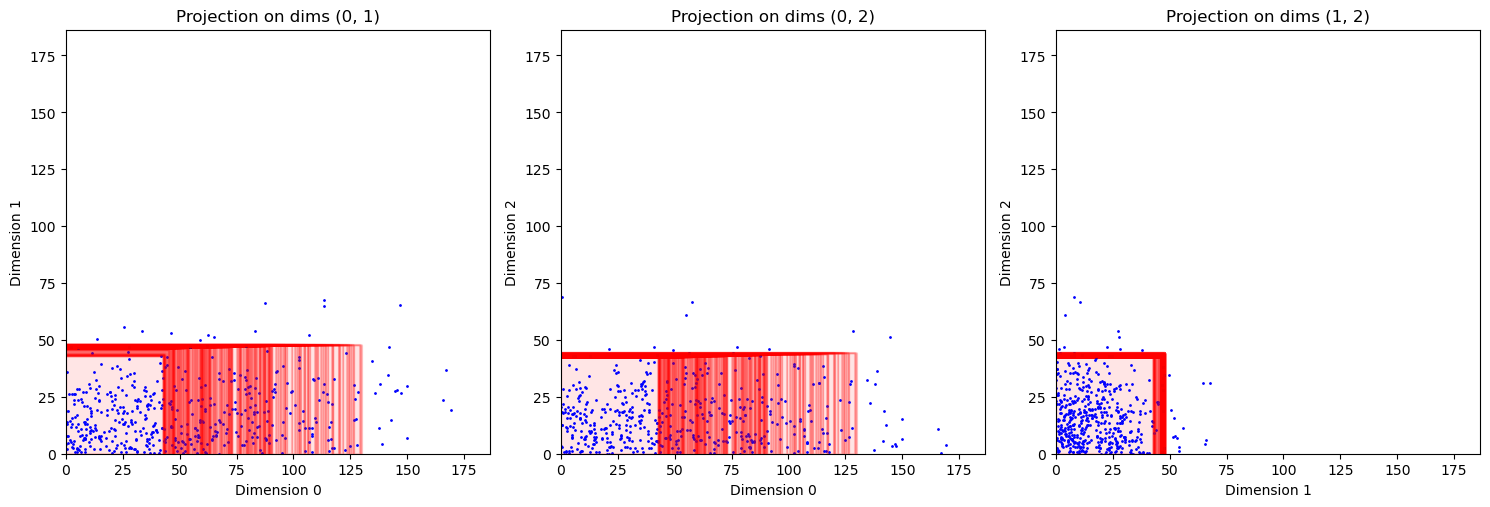

In [7]:
fig2, axes2 = norm.make_scoreRegion_plot_norm(scores_test, regions)
plt.show()

In [9]:
norm.coverage_rate_norm(scores_test, regions)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.

0.898

In [10]:
scores[0]

array([52.16725422,  9.02198273, 47.46560593])